In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = {
    'Model': ['Perceptron', 'Logistic Regression', 'MLP', 'Bagging'],
    'Accuracy': [0.5, 0.16666666666666666, 0.3333333333333333, 0.5],
    'Precision': [0.62, 0.42, 0.56, 0.62],
    'Recall': [0.5, 0.17, 0.33, 0.5],
    'F1-Score': [0.56, 0.24, 0.42, 0.56]
}

In [5]:
# Tạo DataFrame
df = pd.DataFrame(data)

In [6]:
# Kiểm tra DataFrame
print(df)

                 Model  Accuracy  Precision  Recall  F1-Score
0           Perceptron  0.500000       0.62    0.50      0.56
1  Logistic Regression  0.166667       0.42    0.17      0.24
2                  MLP  0.333333       0.56    0.33      0.42
3              Bagging  0.500000       0.62    0.50      0.56


C:\Users\buila\AppData\Local\Temp\ipykernel_22060\2343508263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='Blues')


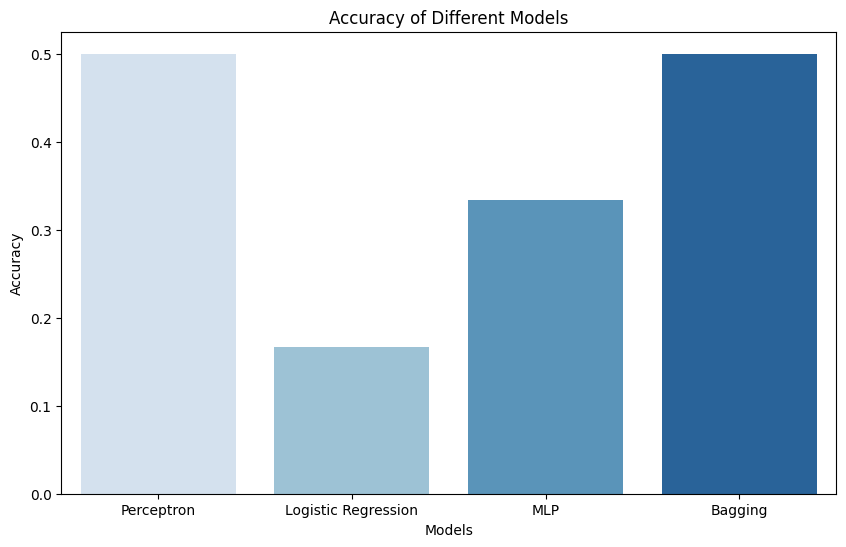

In [7]:
# Vẽ biểu đồ so sánh độ chính xác của các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='Blues')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

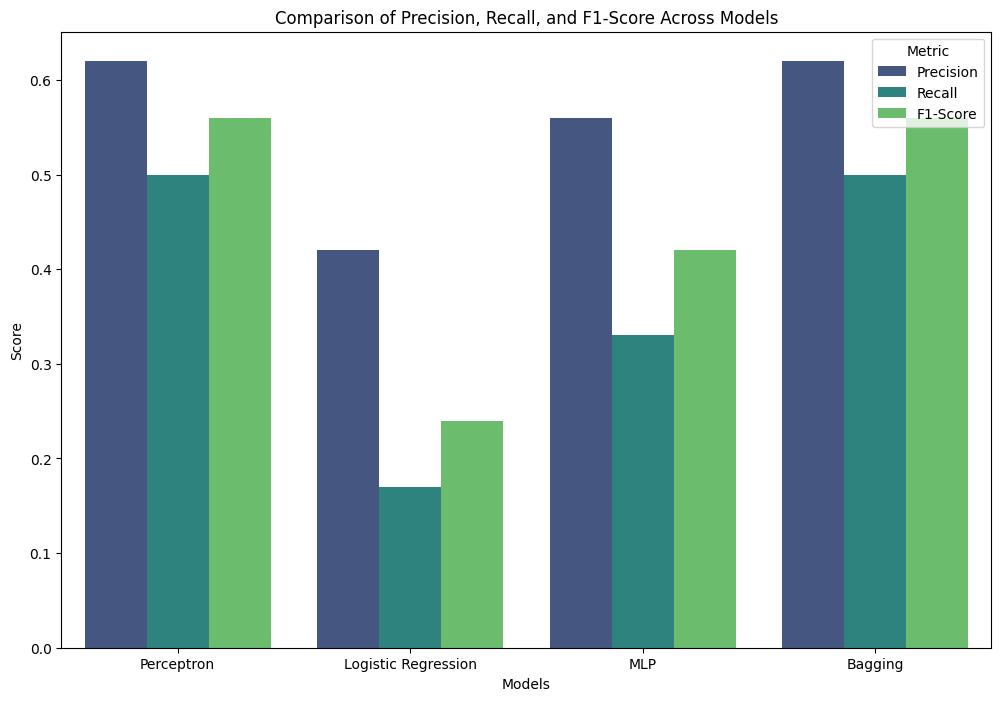

In [8]:
# Tạo biểu đồ cột so sánh Precision, Recall và F1-Score cho từng mô hình
metrics = ['Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(12, 8))
df_melted = df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')
plt.title('Comparison of Precision, Recall, and F1-Score Across Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()

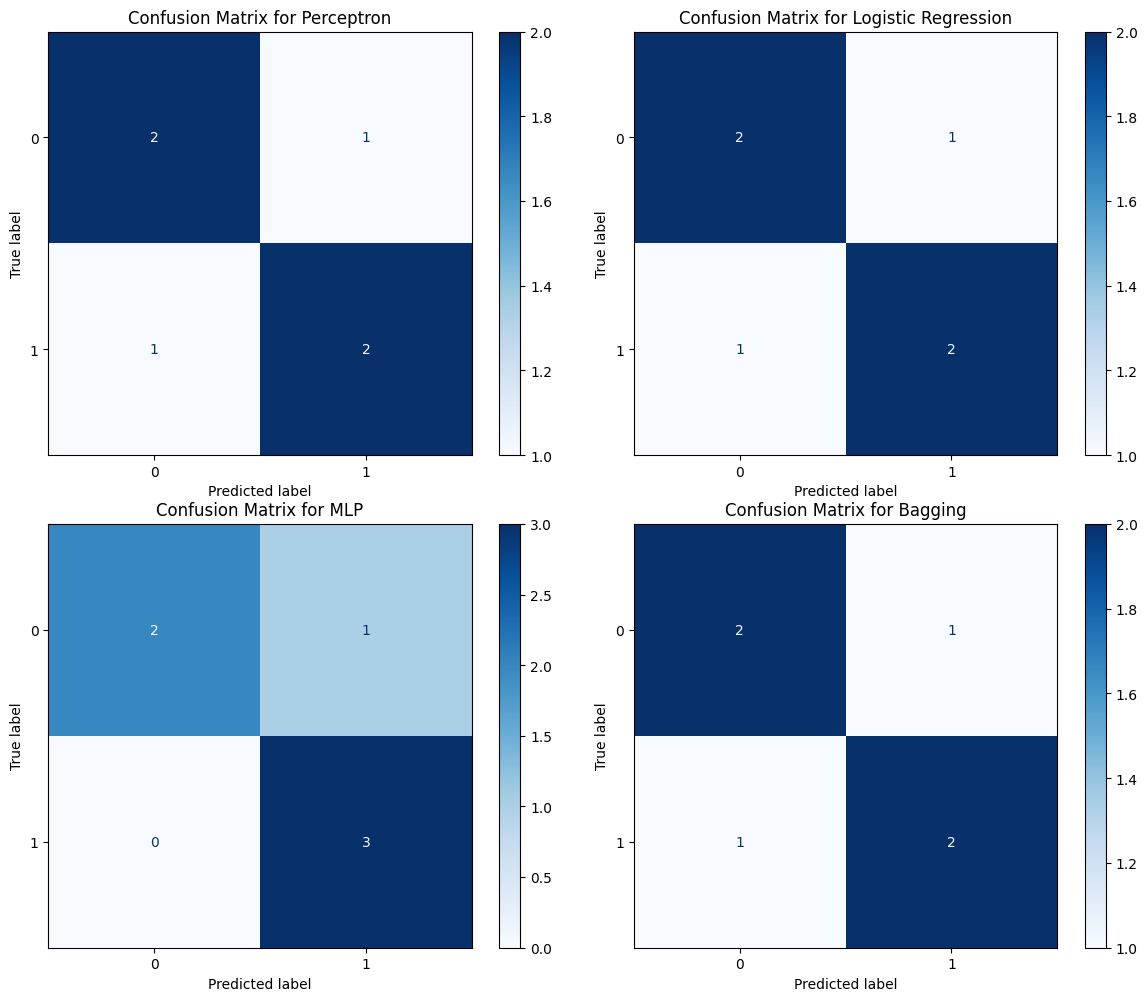

In [9]:
# y_true là nhãn thật, và các y_pred_* là dự đoán của từng mô hình
y_true = [0, 1, 0, 1, 0, 1]  # Thay bằng dữ liệu thật của bạn
y_pred_perceptron = [0, 0, 1, 1, 0, 1]
y_pred_logistic = [0, 1, 0, 0, 1, 1]
y_pred_mlp = [0, 1, 1, 1, 0, 1]
y_pred_bagging = [0, 1, 0, 1, 1, 0]

# Tạo một danh sách chứa tất cả các mô hình và dự đoán
models = {
    'Perceptron': y_pred_perceptron,
    'Logistic Regression': y_pred_logistic,
    'MLP': y_pred_mlp,
    'Bagging': y_pred_bagging
}

# Vẽ ma trận nhầm lẫn cho từng mô hình
plt.figure(figsize=(12, 10))
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', ax=plt.gca())
    plt.title(f'Confusion Matrix for {model_name}')

plt.tight_layout()
plt.show()